# EDA: Sales Performance Report DQLab Store
Link: https://www.kaggle.com/datasets/dhawyfarrasputra/sales-performance-report-dqlab-store

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
#loading the data into a dataframe
df = pd.read_csv('/Users/conniechung/Downloads/raw_data.csv')
df.head()

,order_id | order_status | customer | order_date | order_quantity | sales | discount | discount_value | product_category | product_sub_category |
0,+----------+-----------------+----------------...
1,| 3 | Order Finished | Muhammed MacInt...
2,| 293 | Order Finished | Barry French ...
3,| 483 | Order Finished | Clay Rozendal ...
4,| 515 | Order Finished | Carlos Soltero ...


## Cleaning the data

In [261]:
#dropping thee first row
df = df.iloc[1:].reset_index(drop=True)
df.head()

,order_id | order_status | customer | order_date | order_quantity | sales | discount | discount_value | product_category | product_sub_category |
0,| 3 | Order Finished | Muhammed MacInt...
1,| 293 | Order Finished | Barry French ...
2,| 483 | Order Finished | Clay Rozendal ...
3,| 515 | Order Finished | Carlos Soltero ...
4,| 613 | Order Finished | Carl Jackson ...


In [262]:
#changing the column name to something more manageable for time-being
df_1 = pd.DataFrame()
df_1['col']=df[' order_id | order_status    | customer               | order_date | order_quantity | sales     | discount | discount_value | product_category | product_sub_category           |']
df_1.head()

,col
0,| 3 | Order Finished | Muhammed MacInt...
1,| 293 | Order Finished | Barry French ...
2,| 483 | Order Finished | Clay Rozendal ...
3,| 515 | Order Finished | Carlos Soltero ...
4,| 613 | Order Finished | Carl Jackson ...


In [263]:
#removing the leading and trailing '|'
df_1['col'] = df_1['col'].str.strip().str.lstrip('|').str.rstrip('|')
df_1.head()

,col
0,3 | Order Finished | Muhammed MacInty...
1,293 | Order Finished | Barry French ...
2,483 | Order Finished | Clay Rozendal ...
3,515 | Order Finished | Carlos Soltero ...
4,613 | Order Finished | Carl Jackson ...


In [264]:
#splitting up the data into seperate columns
df_1 = df_1['col'].str.split('|', expand=True)
df_1.head()

,0,1,2,3,4,5,6,7,8,9
0,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


In [265]:
#renaming the column names
df_1.columns = [
    'order_id', 'order_status', 'customer', 'order_date',
    'order_quantity', 'sales', 'discount', 'discount_value',
    'product_category', 'product_sub_category'
]

In [266]:
df_1.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


In [267]:
df_1.tail()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
5495,52706,Order Finished,Paul Prost,2012-07-09,34,2083320,0.02,41666,Office Supplies,Binders and Binder Accessories
5496,54279,Order Finished,Lisa DeCherney,2011-07-30,41,20142180,0.1,2014218,Technology,Office Machines
5497,55558,Order Finished,Philip Brown,2010-08-09,8,2588080,0.05,129404,Furniture,Bookcases
5498,56581,Order Finished,Lisa DeCherney,2009-02-08,20,4052020,0.1,405202,Furniture,Office Furnishings
5499,+----------+-----------------+----------------...,None,None,None,None,None,None,None,None,None


In [268]:
#removing the last row
df_1 = df_1.iloc[:-1]

In [269]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   order_id              5499 non-null   object
 1   order_status          5499 non-null   object
 2   customer              5499 non-null   object
 3   order_date            5499 non-null   object
 4   order_quantity        5499 non-null   object
 5   sales                 5499 non-null   object
 6   discount              5499 non-null   object
 7   discount_value        5499 non-null   object
 8   product_category      5499 non-null   object
 9   product_sub_category  5499 non-null   object
dtypes: object(10)
memory usage: 429.7+ KB


In [270]:
#fixing the datatypes

#int64: order_id, order_quantity, sales, discount_value
df_1['order_id'] = df_1['order_id'].astype(int)
df_1['order_quantity'] = df_1['order_quantity'].astype(int)
df_1['sales'] = df_1['sales'].astype(int)
df_1['discount_value'] = df_1['discount_value'].astype(int)

#float: discount
df_1['discount'] = df_1['discount'].astype(float)

#datetime: order_date
df_1['order_date'] = pd.to_datetime(df_1['order_date'])

In [271]:
#datatypes are fixed
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5499 non-null   int64         
 1   order_status          5499 non-null   object        
 2   customer              5499 non-null   object        
 3   order_date            5499 non-null   datetime64[ns]
 4   order_quantity        5499 non-null   int64         
 5   sales                 5499 non-null   int64         
 6   discount              5499 non-null   float64       
 7   discount_value        5499 non-null   int64         
 8   product_category      5499 non-null   object        
 9   product_sub_category  5499 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 429.7+ KB


In [272]:
df_1.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed MacIntyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones and Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders and Binder Accessories


In [359]:
df_1.describe()

,order_id,order_date,order_quantity,sales,discount,discount_value,month,year,total_revenue
count,5499.000000,5499,5499.000000,5.499000e+03,5499.000000,5.499000e+03,5499.000000,5499.000000,5.499000e+03
mean,29970.202219,2010-12-28 09:05:59.410801920,25.521549,3.532838e+06,0.049915,1.735048e+05,6.514821,2010.492089,3.359333e+06
min,3.000000,2009-01-01 00:00:00,1.000000,6.460000e+03,0.000000,0.000000e+00,1.000000,2009.000000,6.072000e+03
25%,15044.500000,2009-12-24 12:00:00,13.000000,2.826700e+05,0.020000,7.739000e+03,4.000000,2009.000000,2.700805e+05
50%,29927.000000,2010-12-21 00:00:00,26.000000,8.546400e+05,0.050000,3.191700e+04,7.000000,2010.000000,8.125920e+05
75%,44646.500000,2012-01-05 00:00:00,38.000000,3.298741e+06,0.080000,1.329000e+05,9.000000,2012.000000,3.126765e+06
max,59973.000000,2012-12-30 00:00:00,50.000000,1.781221e+08,0.170000,7.441778e+06,12.000000,2012.000000,1.781221e+08
std,17243.318085,NaN,14.485352,7.305121e+06,0.031783,4.183615e+05,3.426077,1.124353,6.987248e+06


In [273]:
#checking duplicates
df_1.duplicated().sum()

0

In [274]:
#checking for nulls
df_1.isnull().sum()

order_id                0
order_status            0
customer                0
order_date              0
order_quantity          0
sales                   0
discount                0
discount_value          0
product_category        0
product_sub_category    0
dtype: int64

In [275]:
#there are leading and trailing spaces...
df_1['order_status'].unique()

array([' Order Finished  ', ' Order Returned  ', ' Order Cancelled '],
      dtype=object)

In [276]:
#removing the leading and trailing spaces for all object datatype columns
df_1['order_status'] = df_1['order_status'].str.strip()
df_1['customer'] = df_1['customer'].str.strip()
df_1['product_category'] = df_1['product_category'].str.strip()
df_1['product_sub_category'] = df_1['product_sub_category'].str.strip()

## Order status

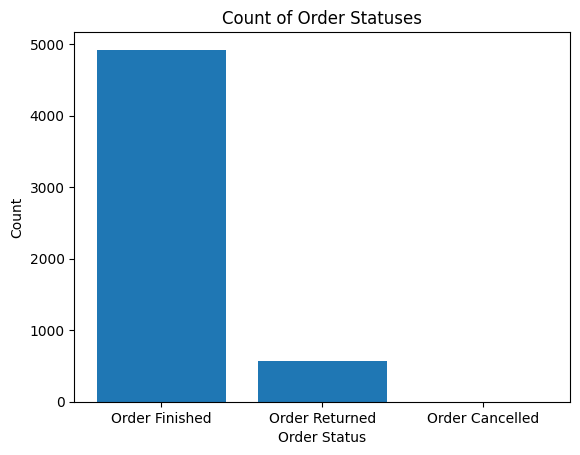

In [277]:
plt.bar(order_counts.index,order_counts.values)
plt.title('Count of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count');

In [278]:
percentage_order = order_counts/df_1.shape[0]*100
percentage_order

order_status
Order Finished     89.543553
Order Returned     10.401891
Order Cancelled     0.054555
Name: count, dtype: float64

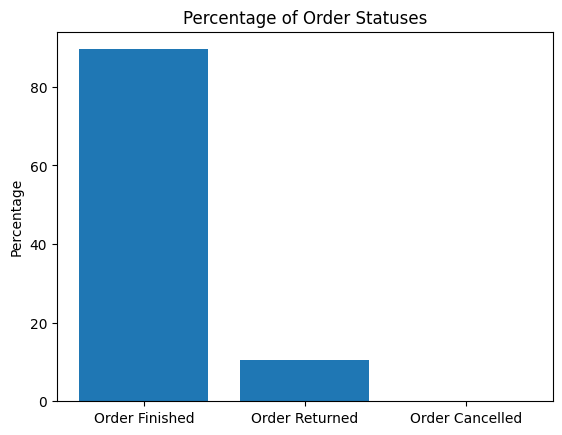

In [279]:
plt.bar(percentage_order.index,percentage_order.values)
plt.title('Percentage of Order Statuses')
plt.xlabel('')
plt.ylabel('Percentage');

## Product catergory

In [280]:
catergory_counts = df_1['product_category'].value_counts()
catergory_counts

product_category
Office Supplies    3066
Technology         1280
Furniture          1153
Name: count, dtype: int64

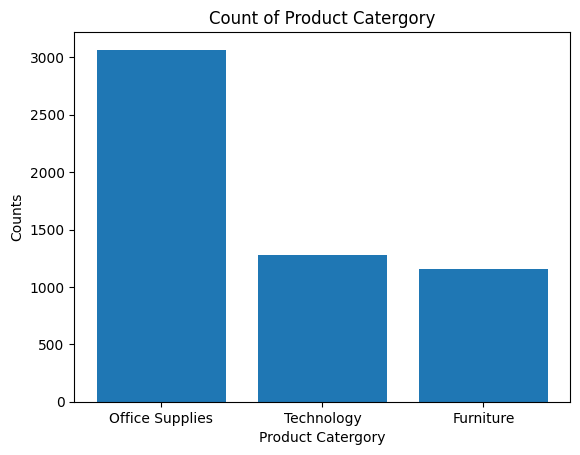

In [281]:
plt.bar(catergory_counts.index, catergory_counts.values)
plt.title('Count of Product Catergory')
plt.xlabel('Product Catergory')
plt.ylabel('Counts');

In [282]:
percentage_catergory = catergory_counts/df_1.shape[0]*100
percentage_catergory

product_category
Office Supplies    55.755592
Technology         23.276959
Furniture          20.967449
Name: count, dtype: float64

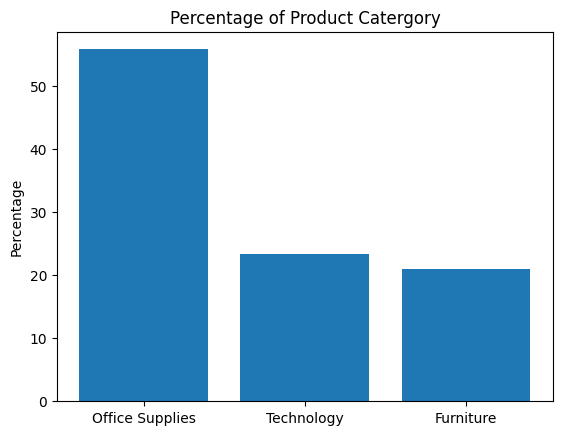

In [283]:
plt.bar(percentage_catergory.index,percentage_catergory.values)
plt.title('Percentage of Product Catergory')
plt.xlabel('')
plt.ylabel('Percentage');

## Product sub-catergory

In [284]:
sub_counts = df_1['product_sub_category'].value_counts()
sub_counts

product_sub_category
Binders and Binder Accessories    768
Paper                             736
Computer Peripherals              561
Office Furnishings                530
Telephones and Communication      429
Appliances                        375
Pens & Art Supplies               359
Chairs & Chairmats                301
Storage & Organization            276
Office Machines                   234
Labels                            206
Tables                            180
Envelopes                         174
Bookcases                         142
Rubber Bands                       97
Scissors, Rulers and Trimmers      75
Copiers and Fax                    56
Name: count, dtype: int64

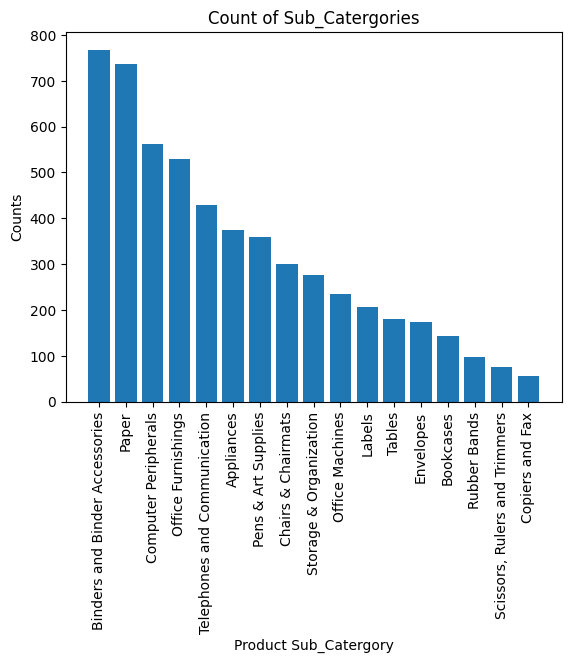

In [357]:
plt.bar(sub_counts.index, sub_counts.values)
plt.title('Count of Sub_Catergories')
plt.xlabel('Product Sub_Catergory')
plt.ylabel('Counts')
plt.xticks(rotation=90);

In [286]:
percentage_sub = sub_counts/df_1.shape[0]*100
percentage_sub

product_sub_category
Binders and Binder Accessories    13.966176
Paper                             13.384252
Computer Peripherals              10.201855
Office Furnishings                 9.638116
Telephones and Communication       7.801418
Appliances                         6.819422
Pens & Art Supplies                6.528460
Chairs & Chairmats                 5.473722
Storage & Organization             5.019094
Office Machines                    4.255319
Labels                             3.746136
Tables                             3.273322
Envelopes                          3.164212
Bookcases                          2.582288
Rubber Bands                       1.763957
Scissors, Rulers and Trimmers      1.363884
Copiers and Fax                    1.018367
Name: count, dtype: float64

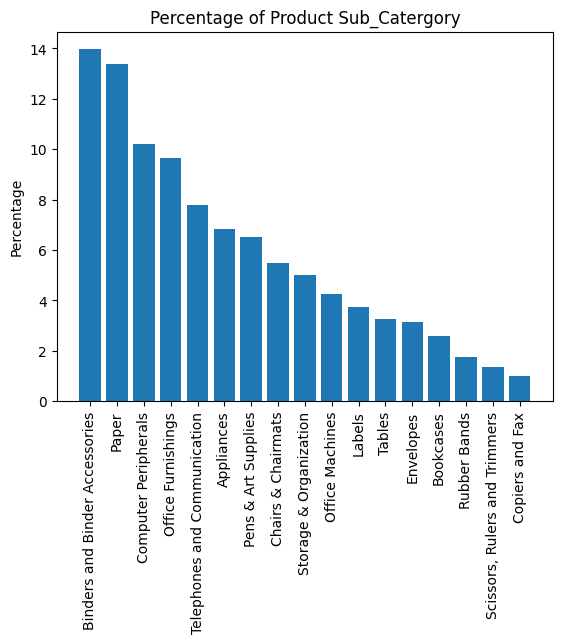

In [358]:
plt.bar(percentage_sub.index,percentage_sub.values)
plt.title('Percentage of Product Sub_Catergory')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=90);

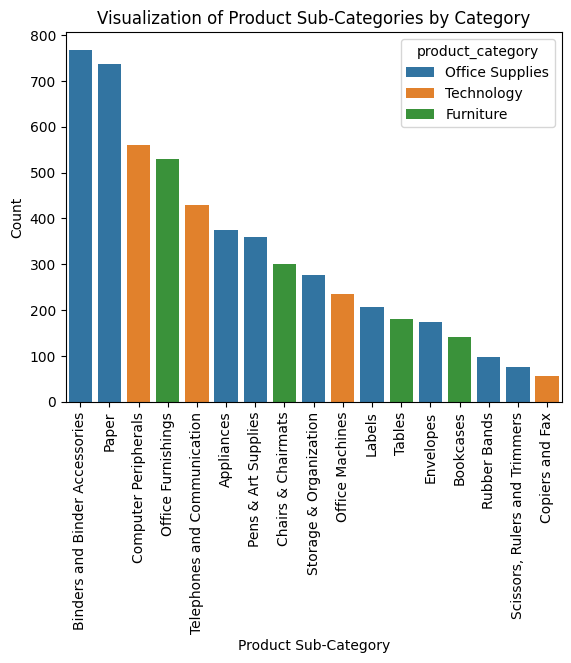

In [288]:
sns.countplot(data=df_1, x='product_sub_category', hue='product_category', order=sub_counts.index, palette='tab10')
plt.xticks(rotation=90)
plt.title('Visualization of Product Sub-Categories by Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Count');

## Top 5 customer with the most sales

In [289]:
top_customer = df_1.groupby('customer')['sales'].sum().sort_values(ascending=False).head()
top_customer

customer
Emily Phan                220589920
Christina Vanderzanden    186631624
Deborah Brumfield         182192930
Grant Carroll             170382287
Sylvia Foulston           156170673
Name: sales, dtype: int64

## March had the most sales across all years (2009-2012)

/var/folders/jw/yykmt8wj3s91vs7p5ss2kcr80000gn/T/ipykernel_80566/616824797.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='month', y='sales', palette='viridis')


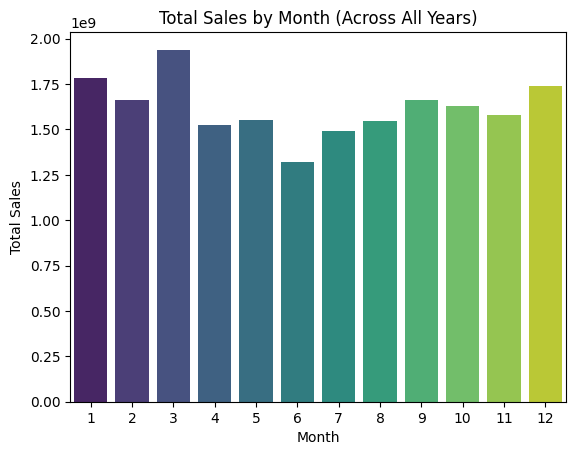

In [290]:
df_1['month'] = df_1['order_date'].dt.month
df_1['year'] = df_1['order_date'].dt.year

monthly_sales = df_1.groupby('month')['sales'].sum().reset_index()

sns.barplot(data=monthly_sales, x='month', y='sales', palette='viridis')
plt.title('Total Sales by Month (Across All Years)')
plt.xlabel('Month')
plt.ylabel('Total Sales');
#plt.xticks(ticks=range(12), labels=[
    #'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    #'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
#])

## Year 2009 had the most total sales

/var/folders/jw/yykmt8wj3s91vs7p5ss2kcr80000gn/T/ipykernel_80566/367170265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly_sales, x='year', y='sales', palette='viridis')


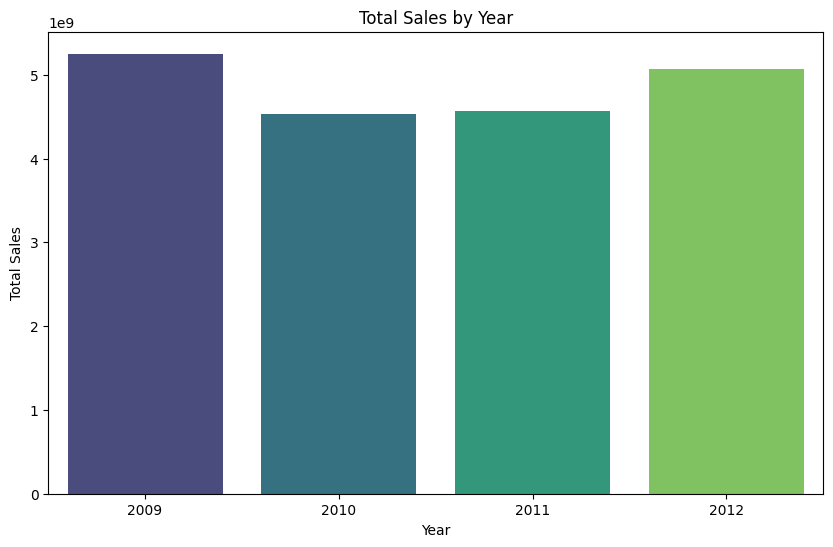

In [291]:
yearly_sales = df_1.groupby('year')['sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='year', y='sales', palette='viridis')

plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales');

## Total sales = $19,427,074,751

In [292]:
total_sales = df_1['sales'].sum()
total_sales

19427074751

## Highest discount is 17%

In [293]:
df_1['discount'].sort_values(ascending=False).head()

918     0.17
962     0.16
878     0.11
5498    0.10
3948    0.10
Name: discount, dtype: float64

## Total number of orders

In [319]:
total_orders = df_1['order_id'].count()
total_orders

5499

## Average order amount

In [296]:
df_1['sales'].mean()

3532837.7434078925

## Total discount amount

In [297]:
discount = df_1['discount_value'].sum()
discount

954102735

## Average discount value

In [298]:
df_1['discount_value'].mean()

173504.77086743043

## Revenue = sales - discount

In [299]:
revenue = total_sales - discount
revenue

18472972016

## Sales by Product Category

In [300]:
df_1.groupby('product_category')['sales'].sum().sort_values(ascending=False)

product_category
Technology         7422758843
Furniture          6655751588
Office Supplies    5348564320
Name: sales, dtype: int64

## Sales by Product Category

In [301]:
df_1.groupby('product_sub_category')['sales'].sum().sort_values(ascending=False)

product_sub_category
Office Machines                   2992042700
Chairs & Chairmats                2796723780
Tables                            1823721028
Telephones and Communication      1759096403
Binders and Binder Accessories    1684448160
Copiers and Fax                   1469965760
Storage & Organization            1317117740
Appliances                        1238552900
Computer Peripherals              1201653980
Bookcases                         1148115720
Office Furnishings                 887191060
Paper                              515461960
Envelopes                          242269680
Pens & Art Supplies                196486220
Scissors, Rulers and Trimmers       83269460
Labels                              54624320
Rubber Bands                        16333880
Name: sales, dtype: int64

## Order quanity by product category

In [303]:
df_1.groupby('product_category')['order_quantity'].sum().sort_values(ascending=False)

product_category
Office Supplies    78422
Technology         32611
Furniture          29310
Name: order_quantity, dtype: int64

## Order quanity by product sub-category

In [304]:
df_1.groupby('product_sub_category')['order_quantity'].sum().sort_values(ascending=False)

product_sub_category
Binders and Binder Accessories    19466
Paper                             18340
Computer Peripherals              14269
Office Furnishings                13687
Telephones and Communication      11395
Pens & Art Supplies                9681
Appliances                         9308
Chairs & Chairmats                 7568
Storage & Organization             7030
Office Machines                    5484
Labels                             5179
Envelopes                          4620
Tables                             4433
Bookcases                          3622
Rubber Bands                       2682
Scissors, Rulers and Trimmers      2116
Copiers and Fax                    1463
Name: order_quantity, dtype: int64

## Order status

In [305]:
df_1['order_status'].value_counts()

order_status
Order Finished     4924
Order Returned      572
Order Cancelled       3
Name: count, dtype: int64

## Total sales by month

In [307]:
df_1.groupby('month')['sales'].sum()

month
1     1782068853
2     1664400513
3     1939128117
4     1524384925
5     1549452537
6     1322027913
7     1490649422
8     1548486326
9     1660224131
10    1629951220
11    1577706337
12    1738594457
Name: sales, dtype: int64

## Total sales by year

In [308]:
df_1.groupby('year')['sales'].sum()

year
2009    5251708895
2010    4535204888
2011    4568206579
2012    5071954389
Name: sales, dtype: int64

In [310]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              5499 non-null   int64         
 1   order_status          5499 non-null   object        
 2   customer              5499 non-null   object        
 3   order_date            5499 non-null   datetime64[ns]
 4   order_quantity        5499 non-null   int64         
 5   sales                 5499 non-null   int64         
 6   discount              5499 non-null   float64       
 7   discount_value        5499 non-null   int64         
 8   product_category      5499 non-null   object        
 9   product_sub_category  5499 non-null   object        
 10  month                 5499 non-null   int32         
 11  year                  5499 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(4)
memory usage

## Repeat buyers/rentention rate

In [333]:
num_customers = df_1['customer'].value_counts()
num_customers

customer
Bill Donatelli            39
Maria Bertelson           33
Darren Budd               26
Brad Thomas               24
Christina Vanderzanden    22
                          ..
Sample Company A           1
Maria Etezadi              1
Andrew Roberts             1
Grace Kelly                1
Bruce Money                1
Name: count, Length: 777, dtype: int64

In [339]:
repeat_orders = num_customers[num_customers>1].count()
repeat_orders

762

In [345]:
total = num_customers.count()
total

777

In [346]:
repeat = repeat_orders/total*100
repeat

98.06949806949807